<a href="https://colab.research.google.com/github/asjaradja/CompMethBioPhys/blob/main/Professor%20Class%20notes/Topic_1_ODE_based_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ordinary Differential Equations Review
Ordinary differential equation (ODE) based models are very common in biophysics. An ordinary differential equation is an equation which is defined for one or more functions of one independent variable and its derivatives. $\frac{dy}{dx}=x+1$ is an example of ODE. The word ordinary is meant to indicate a single independent variable (if there are multiple, the equation would have to use partial derivatives and would be called a partial differential equation).

We will focus mostly on **first order** ordinary differential equations. The order of ordinary differential equations is defined to be the order of the highest derivative that occurs in the equation. A first order ordinary differential equation has only the first derivative $\frac{dy}{dx}$ so that the equation is of the first order and no higher-order derivatives exist. A quick note on notation: remember that $y'≡\frac{dy}{dx}$ so you may see one or the other in different sources, and they mean the same thing.

### Test your understanding
Which of these is a first order ordinary differential equation?
1. $y'+\frac{1}{x}y=2$
2. $y''-9y=0$
3. $\frac{du}{dx}+\frac{du}{dy}=2$

###Solution
a





# Examples of ODEs in biophysics
Despite enormous diversity of living systems, there are certain universal properties one can study and model: growth, self-restriction of growth, competition, spatial nonhomogeneity, and many more. All these properties can be modeled with simple ODEs. We will now look at a few of these!

##Example 1: Unlimited growth
Let's try to model the growth of bacteria in a culture. Bacteria grow by asexual reproduction: a single bacteria divides into 2 daughter cells.

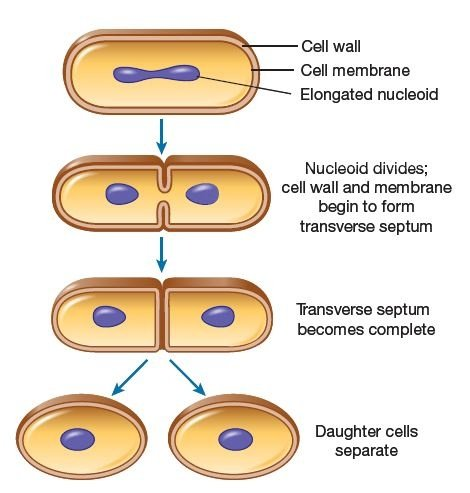

Imagine you take a test tube, add one bacteria to it and add some growth medium (i.e. food for the bacteria so it'll be happy and divide). You then leave your tube for a couple of days and come back to many more bacteria inside.

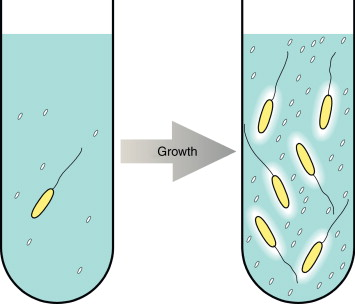

Now let's pretend like we can take data to count the number of bacteria as a function of time. People do this all the time in real experiments, and this is a real graph of results from this kind of experiment:



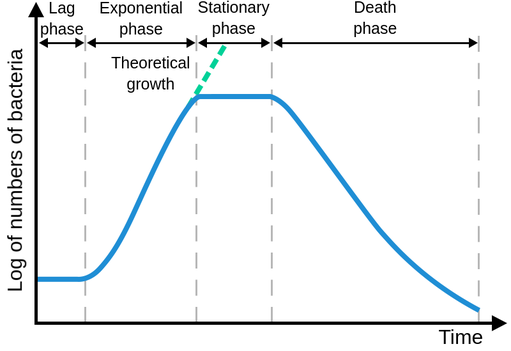

### What are the different parts of this graph that you notice? Discuss.

Lag phase: We see that at first, the number of bacteria doesn't change. This is called the lag phase and just represents the time during which the bacteria are not yet dividing.

Exponential phase: Next, we see that the bacteria start dividing and their numbers increase. **Why do you think we call this the exponential growth phase if the line is straight (i.e. looks linear)?**

Stationary phase and death phase: we won't model these phases yet, but you can see that at some point, the bacteria stop dividing and after their numbers decrease as they die.


### Modeling bacterial growth

What do you think the rate of growth should be proportional too? Think as simply as possible (and you can assume that they have enough food and good conditions to be happy).

The rate of growth is proportional to the population numbers! This is one of the fundamental assumptions underlying all models of growth.

#### How do you represent this in an equation?
Let x be your number of bacteria and t be time

$\frac{dx}{dt}=Rx$, where R is some number that depends on the specifics of your growth scenario.

### What is the solution to this equation?

$ x(t) = x_0 e^{Rt} $

### Plotting

This equation is valid at a certain growth stage for the cell populations in a tissue, for alga or bacteria in a culture. Plot the above x(t) function for $t = 0-5$, $x_0 = 2$ and $R=1$

In [1]:
# Write code here

Text(0.5, 1.0, 'Exponential function')

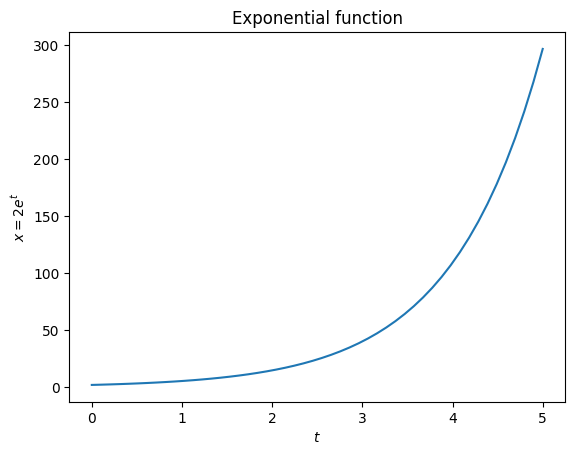

In [7]:
import matplotlib.pyplot as plt
import numpy as np
t = np.linspace(0, 5)
x = 2* np.exp(t)

plt.figure()
plt.plot(t, x)
plt.xlabel("$t$")
plt.ylabel("$x=2 e^t$")
plt.title("Exponential function")

Now plot it as a semi-log graph (with the y-axis as the log). Does your result match what the data showed above?

In [ ]:
# write code here

Text(0.5, 1.0, 'Exponential function')

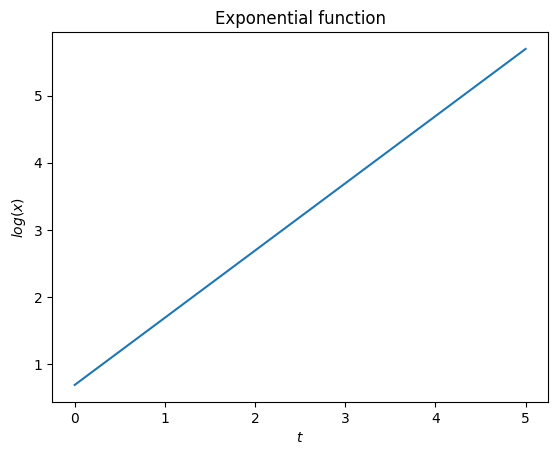

In [10]:
import matplotlib.pyplot as plt
import numpy as np
t = np.linspace(0, 5)
x = np.log(2* np.exp(t))

plt.figure()
plt.plot(t, x)
plt.xlabel("$t$")
plt.ylabel("$log(x)$")
plt.title("Exponential function")

##Example 2: Bounded growth

Now let's include the second part of the data (the part where the growth stops and the population stays constant for a period of time). This is called bounded growth and represents a realistic situation in which, let's say, the bacteria in your tube have eaten all of the food available and there is no more left so they stop reproducing (and stay alive for a time period before dying). Other examples of bounded growth include limitations of space available for a cell population in a tissue, the food base, or refuge for superior animals.

A basic model that describes bounded or limited growth is called the Verhulst model (1848) (it is also called a "logistic function"). Verhulst created this model by modifying the classical growth-decay equation $\frac{dx}{dt}= Rx$, replacing $R$ by $r(1-\frac{x}{K})$. The Verhulst equation is:

$\frac{dx}{dt}=rx(1-\frac{x}{K})$ where K is the "population capacity".

Why do you think K is called the "population capacity"?

The solution to the Verhulst model takes a little time (you have to use the method of partial fractions when taking the integral over x), so I'll just give you the continuous solution for now:

$x(t)=\frac{Kx_0 e^{rt}}{K+x_0 (e^{rt}-1)}$

If you're curious, try to solve it on your own and check your answer here: https://www2.clarku.edu/faculty/djoyce/ma121/logistic.pdf

Let's plot this function to see what logistical growth looks like for $K=3$, $x_0=1$, and $r=1$: $x(t)=\frac{3e^{t}}{e^{t}+2}$

Text(0.5, 1.0, 'Verhulst model')

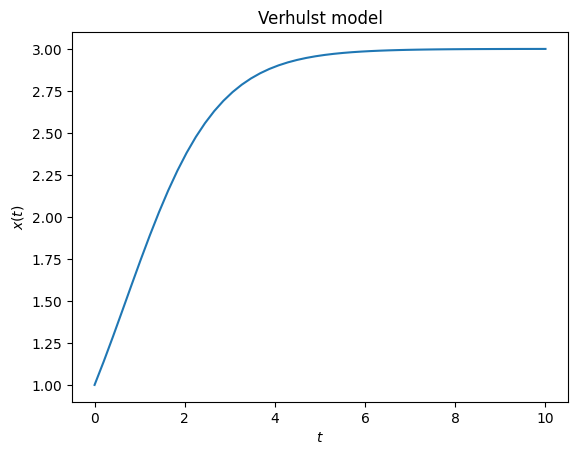

In [18]:
import matplotlib.pyplot as plt
import numpy as np
t = np.linspace(0, 10)
x = (3*np.exp(t))/(np.exp(t)+2)

plt.figure()
plt.plot(t, x)
plt.xlabel("$t$")
plt.ylabel("$x(t)$")
plt.title("Verhulst model")

We can also look at the **discrete** analogue of this equation, which reveals a lot of new and unique properties for us to explore!

Consider the population numbers at well-defined time steps (i.e. every 10 minutes), which corresponds to a real experiment of counting the species (or cells) in a population. The dependence of the numbers at a time step numbered n+1 on the numbers at the preceding step n can be written as:

$x_{n+1}=rx_n(1-x_n)$
